<br>

# Notebook II - Crop Simulation

<hr>
<hr>

## Importing Libraries

In [1]:
'''import supporting libraries'''

import numpy as np
import matplotlib.pyplot as plt
import imageio

import sys
sys.path.append('./code/') # add path to source code directory

## Reading Data

In [2]:
'''reading climate data'''

min_temp = np.load('./sample_data/input/climate/min_temp.npy') # Celcius
max_temp = np.load('./sample_data/input/climate/max_temp.npy') # Celcius
precipitation = np.load('./sample_data/input/climate/precipitation.npy') # mm / day
short_rad = np.load('./sample_data/input/climate/short_rad.npy') # W/m^2
wind_speed = np.load('./sample_data/input/climate/wind_speed.npy') # m/s
rel_humidity = np.load('./sample_data/input/climate/relative_humidity.npy') # Fraction, and assumed as a constant 0.70

In [3]:
'''reading study area and elevation data'''

# admin_mask = imageio.imread('./sample_data/input/LAO_Admin.tif');
# srtm_elevation = imageio.imread('./sample_data/input/SRTM_Elevation.tif'); # m

admin_mask = np.load('./sample_data/input/LAO_Admin.npy');
srtm_elevation = np.load('./sample_data/input/SRTM_Elevation.npy'); # m

## Crop Simulation

In [4]:
'''importing library'''

import CropSimulation
aez = CropSimulation.CropSimulation()

import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [5]:
'''setting input data'''

# latitude limits of the study area
lat_min = 13.90
lat_max = 22.51

aez.setMonthlyClimateData(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)
aez.setLocationTerrainData(lat_min=lat_min, lat_max=lat_max, elevation=srtm_elevation)
aez.setStudyAreaMask(admin_mask=admin_mask, no_data_value=0)

# aez.setCropParameters(LAI=4, HI=0.4, legume=0, adaptability=2, cycle_len=105, D1=0.75, D2=0.75)
# aez.setCropCycleParameters(stage_per=[10, 30, 30, 30], kc=[1.1, 1.2, 1], kc_all=1.1, yloss_f=[1, 2, 2.5, 1], yloss_f_all=2)
aez.setCropParametersFromCSV(r"./sample_data/input/crop_parameter.csv", 'Wheat', 'L')
#aez.setCropParametersFromCSV('./sample_data/input/Crop_parameters.csv', 'Rice', is_perennial=False)

aez.setSoilWaterParameters(Sa=100*np.ones((admin_mask.shape)), pc=0.5)

index: 2
0.75


In [6]:
'''setting study area, climate screening (optional)'''

# aez.setStudyAreaMask(admin_mask=admin_mask, no_data_value=0)

tclimate = imageio.imread(r'./sample_data/output/NB1/ThermalClimate1.tif');
aez.setThermalClimateScreening(tclimate, [1,2])

# user has to select a csv file, containing thermal rules
# use below function to set thermal rules
# must be given a csv file with thermal rules to continue

aez.ReadThermalScreeningRulesFromCSV(r"./sample_data/input/thermalScreeningRules.csv")



In [7]:
'''run simulations'''

aez.simulateCropCycle( start_doy=1, end_doy=365, step_doy=4, leap_year=False) # results are in kg / hectare

Done: 0 %
Done: 0 %
Done: 0 %
Done: 1 %
Done: 2 %
Done: 3 %
Done: 5 %
Done: 7 %
Done: 10 %
Done: 15 %
Done: 20 %
Done: 25 %
Done: 30 %
Done: 34 %
Done: 39 %
Done: 42 %
Done: 45 %
Done: 48 %
Done: 52 %
Done: 57 %
Done: 61 %
Done: 64 %
Done: 66 %
Done: 68 %
Done: 69 %
Done: 71 %
Done: 73 %
Done: 74 %
Done: 76 %
Done: 79 %
Done: 81 %
Done: 84 %
Done: 85 %
Done: 87 %
Done: 90 %
Done: 92 %
Done: 95 %
Done: 97 %
Done: 98 %
Done: 99 %
Simulations Completed !


In [8]:
'''get result'''

yield_map_rain = aez.getEstimatedYieldRainfed()
yield_map_irr = aez.getEstimatedYieldIrrigated()

starting_date = aez.getOptimumCycleStartDate()

## get classified output
yield_map_rain_class = obj_utilities.classifyFinalYield(yield_map_rain)
yield_map_irr_class = obj_utilities.classifyFinalYield(yield_map_irr)

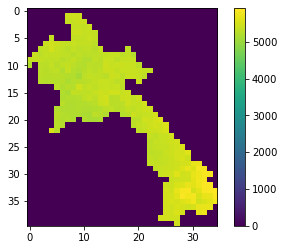

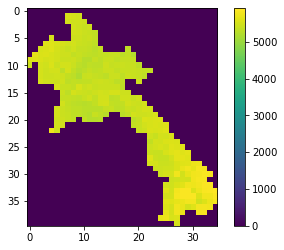

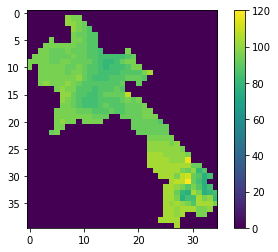

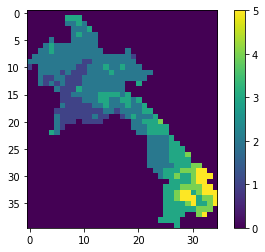

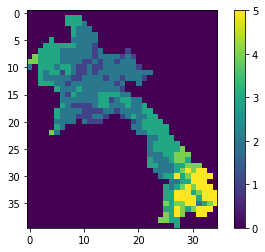

In [9]:
'''visualize result'''

plt.imshow(yield_map_rain)
plt.colorbar()
plt.show()
plt.imshow(yield_map_irr)
plt.colorbar()
plt.show()

plt.imshow(starting_date)
plt.colorbar()
plt.show()

plt.imshow(yield_map_rain_class)
plt.colorbar()
plt.show()
plt.imshow(yield_map_irr_class)
plt.colorbar()
plt.show()

In [10]:
# '''save result'''

 obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB2/CropSuitability_rain.tif', yield_map_rain)
# obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB2/CropSuitability_irr.tif', yield_map_irr)

# obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB2/Starting_date.tif', starting_date)

# obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB2/CropSuitability_rain_class.tif',yield_map_rain_class)
# obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB2/CropSuitability_irr_class.tif',yield_map_irr_class)

In [ ]:
'''Re[0] = thermal screening reduction factor, Re[1]= waterlimit'''
Re= aez.getreductionFactor()
obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif', './sample_data/output/Reduction Factor/F1.tif',Re[0])
obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif', './sample_data/output/Reduction Factor/F12.tif',Re[1])